# Example using the funtions

In [10]:
from functions import *

In [11]:
#paths for data
lunar = './data/lunar/test/data/S12_GradeB'
lunar_2 = './data/lunar/test/data/S15_GradeA'            #10
lunar_3 = './data/lunar/test/data/S15_GradeB'            #5
lunar_4 = './data/lunar/test/data/S16_GradeA'            #14
lunar_5 = './data/lunar/test/data/S16_GradeB'            #3
lunar_training = './data/lunar/training/data/S12_GradeA' #76
mars = './data/mars/test/data'                           #9
earth = './data/EARTH/EARTH'                             #1025

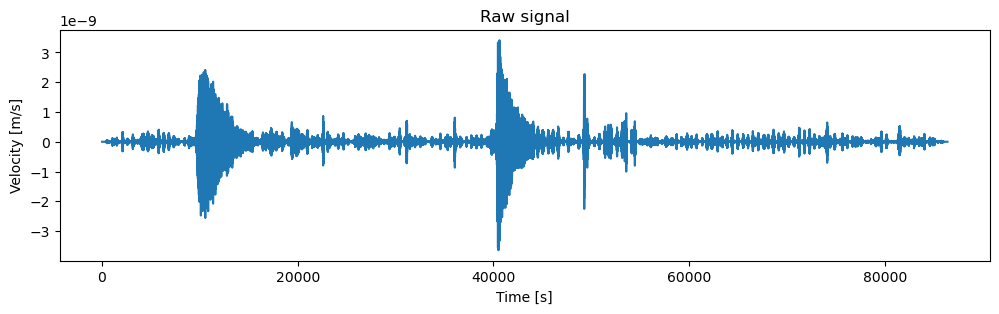

In [12]:
#Extrac data from some source
id=1  #idex of file
tr_times, tr_data_filt_norm, df, tr_data, path_data = data_extrac_test(id, data_directory=lunar_training)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(tr_times, tr_data)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.set_title(f'Raw signal')
plt.show()

In [29]:
print(path_data)

xa.s12.00.mhz.1973-06-05HR00_evid00108.mseed


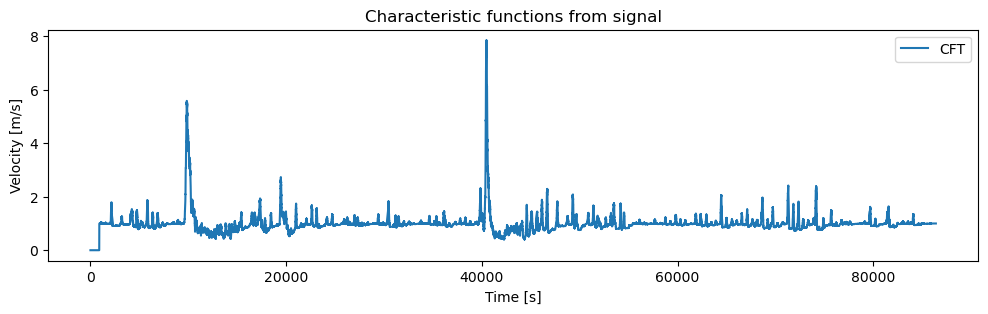

In [13]:
#Using STA/LTA algoritm characteristic function is generated

cft = CFT(tr_data_filt_norm, df, sta_len= 90, lta_len= 900)
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(tr_times, cft, label='CFT')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.set_title(f'Characteristic functions from signal')
ax.legend()
plt.show()

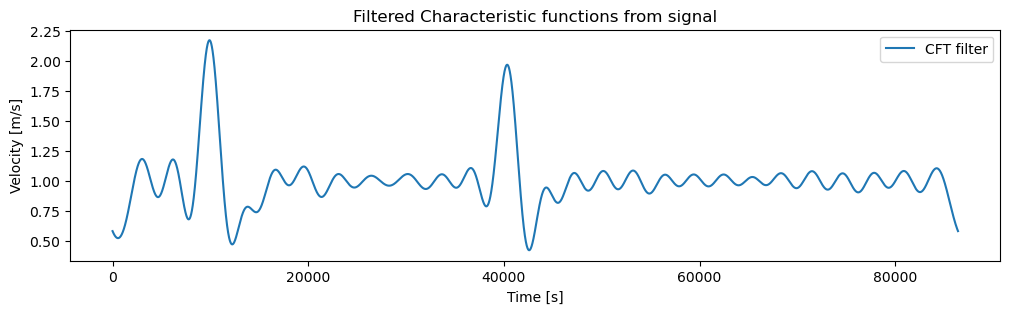

In [14]:
#Filter CFT using fourier methods
cft_filter = fourier_filter(cft, cutoff_freq=0.0001/2)
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
#ax.plot(tr_times, cft, label='CFT')
ax.plot(tr_times, cft_filter, label='CFT filter')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.set_title(f'Filtered Characteristic functions from signal')
ax.legend()
plt.show()

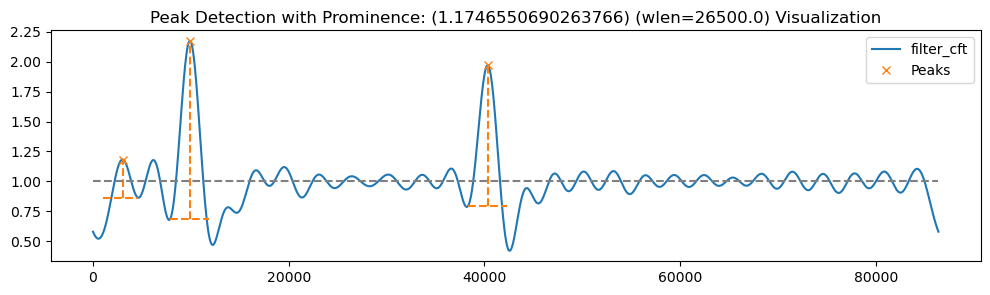

In [15]:
# Find peaks of CFT

peaks, properties = peaks_plot(tr_times, cft_filter, prominence = 0.25, distance=5000*df, wlen_value=4000*df, height=1.1)

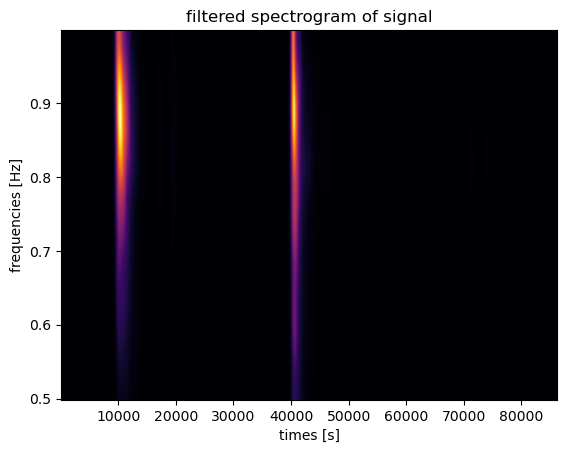

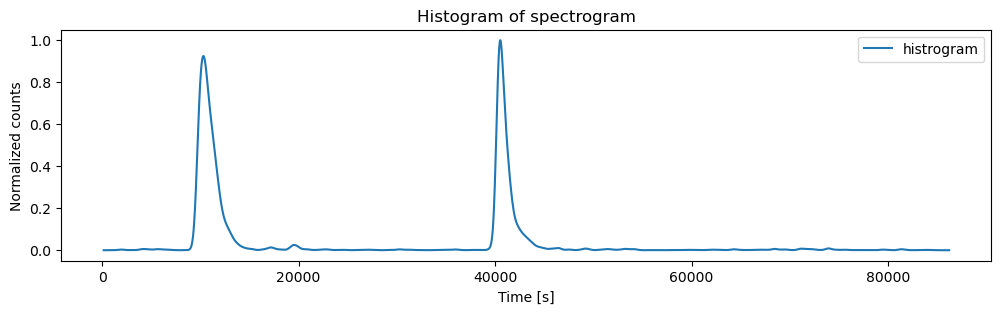

In [16]:
#Second validation of candidats sismic using spectrogram
time_left_bases = tr_times[properties['left_bases']] ##Left base of the time 
time_right_bases = tr_times[properties['right_bases']] ##Rigght base of the time

frequencies, times, sxx = signal.spectrogram(tr_data, df, nperseg=2000, noverlap=1800) ## do spectogram
low_index = get_index_from_f(frequencies, 0.5)      # 0.5 : low typical frecuencie of siesmic
up_index = get_index_from_f(frequencies, 1)         # 1 : high typical frecuencie of siesmic

sxx = sxx[low_index:up_index, :] ## spectogram filtered
frequencies = frequencies[low_index:up_index] ## frequencies filtered
hist, conv = hist_convolve_spectrogram(sxx, 10) ## histogram of the frequencies and convolution of spectogram

plt.pcolormesh(times,frequencies,conv, cmap='inferno')
plt.title('filtered spectrogram of signal')
plt.xlabel('times [s]')
plt.ylabel('frequencies [Hz]')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
#ax.plot(tr_times, cft, label='CFT')
ax.plot(times, hist, label='histrogram')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Normalized counts')
ax.set_title(f'Histogram of spectrogram')
ax.legend()
plt.show()

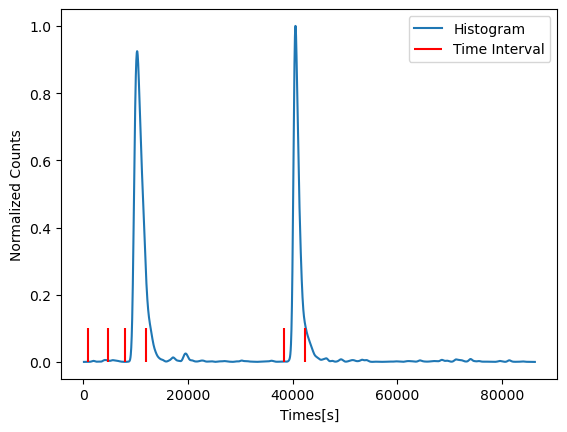

In [17]:
times_peaks, confidence = Confidence(tr_times, tr_data, df, peaks, properties, 0.15, 0.5, 1)
times_left_bases = tr_times[properties['left_bases']] ##Left base of the time 
times_right_bases = tr_times[properties['right_bases']] ##Rigght base of the time

fig, ax = plt.subplots()

# Graficar el histograma con línea blanca
ax.plot(times, hist, label='Histogram')

# Añadir las líneas verticales en las bases de los picos
ax.vlines(times_left_bases, ymin=min(hist), ymax=0.1, color='red',label='Time Interval')
ax.vlines(times_right_bases, ymin=min(hist), ymax=0.1, color='red')

# Configurar el color de los ejes en blanco


# Configurar el color de las marcas (ticks) y etiquetas
# Etiqueta del eje Y en blanco

# Título y etiquetas en blanco
ax.set_xlabel('Times[s]')
ax.set_ylabel('Normalized Counts')
ax.legend()

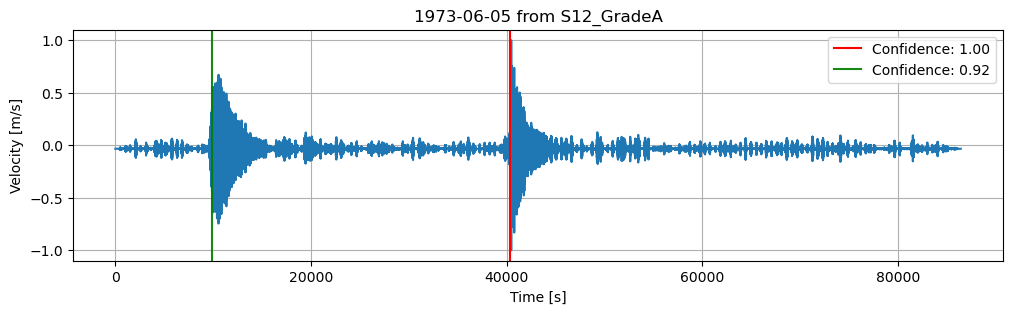

In [30]:
path = 'data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1973-06-05HR00_evid00108.mseed'
Seismic_Plot(tr_times, tr_data_filt_norm, path, times_peaks, confidence)

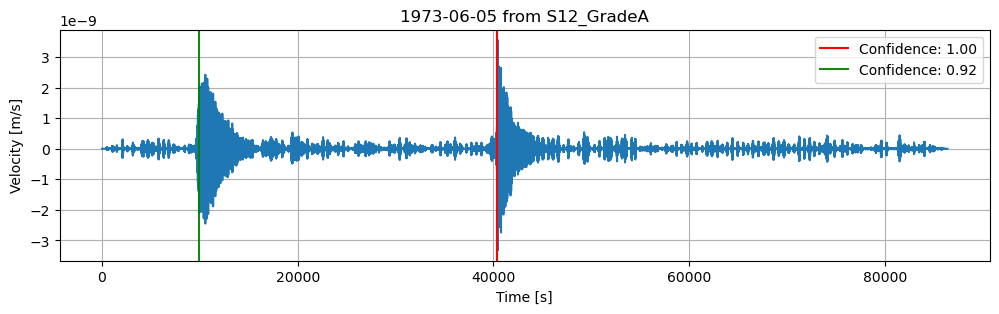

In [32]:
#So this work flow is condensed in this function
work_flow(path, 'lunar')